# Entity Extraction untuk tes NLP Engineer

Pendekatan yang digunakan untuk menyelesaikan project ini adalah mengggunakan NER (Named Entity Recognition). NER memanfaatkan model untuk mendeteksi entitas yang ada dalam sebuah kalimat, seperti nama orang, nama perusahaan, nama hari, waktu, dll. NER menggunakan kemampuan dari model dalam mengklasifikasikan token yang dibuat oleh model sehingga masing-masing token yang ada dapat diklasifikasikan sesuai dengan entitas dalam kalimat.



Model dalam pendekatan ini dikembangakan dengan menggunakan teknik fine-tuning. Fine-tuning dilakukan pada model [IndoBERT](https://https://huggingface.co/indolem/indobert-base-uncased) dengan menggunakan dataset dari [id_nergit_corpus](https://huggingface.co/datasets/id_nergrit_corpus). Proses fine-tuning dilakukan dengan alasan memanfaatkan model yang sudah dilatih dengan corpus yang lebih besar dan memiliki performa yang baik agar bisa digunakan untuk kebutuhan spesifik sesuai dengan yang dibutuhkan. Dalam hal ini digunakan untuk task NER.

# Install main resources


In [ ]:
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.6 MB/s eta 0:00:00


# Load Dataset

In [ ]:
# Load Dataset
from datasets import load_dataset

nergit = load_dataset("id_nergrit_corpus", "ner")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/12532 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2399 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2521 [00:00<?, ? examples/s]

In [ ]:
nergit['train']

Dataset({
    features: ['id', 'tokens', 'ner_tags'],
    num_rows: 12532
})

In [ ]:
nergit["train"][0]

{'id': '0',
 'tokens': ['Indonesia',
  'mengekspor',
  'produk',
  'industri',
  'skala',
  'besar',
  'ke',
  'Amerika',
  'Serikat',
  '.',
  'Ekspor',
  'dilakukan',
  'melalui',
  'Pelabuhan',
  'Tanjung',
  'Priok',
  ',',
  'Jakarta',
  'Utara',
  ',',
  'Selasa',
  '(',
  '15',
  '/',
  '8',
  '/',
  '2018',
  ')',
  '.',
  'Komoditas',
  'yang',
  'dikirim',
  'terdiri',
  'dari',
  '50',
  'persen',
  'sepatu',
  ',',
  '15',
  'persen',
  'garmen',
  ',',
  '10',
  'persen',
  'produk',
  'karet',
  ',',
  'ban',
  'dan',
  'turunannya',
  ',',
  'alat',
  '-',
  'alat',
  'elektronik',
  '10',
  'persen',
  ',',
  'dan',
  'produk',
  'lainnya',
  '15',
  'persen',
  '.',
  '"',
  'Bukan',
  'bahan',
  'mentah',
  ',',
  'tetapi',
  'sudah',
  'bahan',
  '-',
  'bahan',
  'produksi',
  ',',
  'produk',
  '-',
  'produk',
  'industri',
  'yang',
  'kita',
  'harapkan',
  'ini',
  'akan',
  'meningkatkan',
  'ekspor',
  'kita',
  ',',
  '"',
  'kata',
  'Presiden',
  'dalam',


In [ ]:
# List of token (label) in the dataset
label_list = nergit["train"].features[f"ner_tags"].feature.names
label_list

['B-CRD',
 'B-DAT',
 'B-EVT',
 'B-FAC',
 'B-GPE',
 'B-LAN',
 'B-LAW',
 'B-LOC',
 'B-MON',
 'B-NOR',
 'B-ORD',
 'B-ORG',
 'B-PER',
 'B-PRC',
 'B-PRD',
 'B-QTY',
 'B-REG',
 'B-TIM',
 'B-WOA',
 'I-CRD',
 'I-DAT',
 'I-EVT',
 'I-FAC',
 'I-GPE',
 'I-LAN',
 'I-LAW',
 'I-LOC',
 'I-MON',
 'I-NOR',
 'I-ORD',
 'I-ORG',
 'I-PER',
 'I-PRC',
 'I-PRD',
 'I-QTY',
 'I-REG',
 'I-TIM',
 'I-WOA',
 'O']

# Preprocess

In [ ]:
# Load tokenizer from the pretrained model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
example = nergit["train"][0]
tokenized_input = tokenizer(example["tokens"], is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['[CLS]',
 'indonesia',
 'mengekspor',
 'produk',
 'industri',
 'skala',
 'besar',
 'ke',
 'amerika',
 'serikat',
 '.',
 'ekspor',
 'dilakukan',
 'melalui',
 'pelabuhan',
 'tanjung',
 'priok',
 ',',
 'jakarta',
 'utara',
 ',',
 'selasa',
 '(',
 '15',
 '/',
 '8',
 '/',
 '2018',
 ')',
 '.',
 'komoditas',
 'yang',
 'dikirim',
 'terdiri',
 'dari',
 '50',
 'persen',
 'sepatu',
 ',',
 '15',
 'persen',
 'garmen',
 ',',
 '10',
 'persen',
 'produk',
 'karet',
 ',',
 'ban',
 'dan',
 'turunan',
 '##nya',
 ',',
 'alat',
 '-',
 'alat',
 'elektronik',
 '10',
 'persen',
 ',',
 'dan',
 'produk',
 'lainnya',
 '15',
 'persen',
 '.',
 '"',
 'bukan',
 'bahan',
 'mentah',
 ',',
 'tetapi',
 'sudah',
 'bahan',
 '-',
 'bahan',
 'produksi',
 ',',
 'produk',
 '-',
 'produk',
 'industri',
 'yang',
 'kita',
 'harapkan',
 'ini',
 'akan',
 'meningkatkan',
 'ekspor',
 'kita',
 ',',
 '"',
 'kata',
 'presiden',
 'dalam',
 'sambutannya',
 'pada',
 'acara',
 'pelepasan',
 'ekspor',
 'di',
 'jakarta',
 'international',
 

In [ ]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples[f"ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)  # Map tokens to their respective word.
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:  # Set the special tokens to -100.
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:  # Only label the first token of a given word.
                label_ids.append(label[word_idx])
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [ ]:
tokenized_nergit = nergit.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/12532 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2399 [00:00<?, ? examples/s]

Map:   0%|          | 0/2521 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer, return_tensors="tf")

# Evaluate

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=92c0ea941f6cddfaeae95cb9861127700abf52209695279a8e7c86ee8c2b3666
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
import evaluate

seqeval = evaluate.load("seqeval")

In [ ]:
# Building metrics
import numpy as np

labels = [label_list[i] for i in example[f"ner_tags"]]


def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

# Train

In [ ]:
id2label = {
    0: 'B-CRD',
    1: 'B-DAT',
    2: 'B-EVT',
    3: 'B-FAC',
    4: 'B-GPE',
    5: 'B-LAN',
    6: 'B-LAW',
    7: 'B-LOC',
    8: 'B-MON',
    9: 'B-NOR',
    10: 'B-ORD',
    11: 'B-ORG',
    12: 'B-PER',
    13: 'B-PRC',
    14: 'B-PRD',
    15: 'B-QTY',
    16: 'B-REG',
    17: 'B-TIM',
    18: 'B-WOA',
    19: 'I-CRD',
    20: 'I-DAT',
    21: 'I-EVT',
    22: 'I-FAC',
    23: 'I-GPE',
    24: 'I-LAN',
    25: 'I-LAW',
    26: 'I-LOC',
    27: 'I-MON',
    28: 'I-NOR',
    29: 'I-ORD',
    30: 'I-ORG',
    31: 'I-PER',
    32: 'I-PRC',
    33: 'I-PRD',
    34: 'I-QTY',
    35: 'I-REG',
    36: 'I-TIM',
    37: 'I-WOA',
    38: 'O'
}
label2id = {
    'B-CRD': 0,
    'B-DAT': 1,
    'B-EVT': 2,
    'B-FAC': 3,
    'B-GPE': 4,
    'B-LAN': 5,
    'B-LAW': 6,
    'B-LOC': 7,
    'B-MON': 8,
    'B-NOR': 9,
    'B-ORD': 10,
    'B-ORG': 11,
    'B-PER': 12,
    'B-PRC': 13,
    'B-PRD': 14,
    'B-QTY': 15,
    'B-REG': 16,
    'B-TIM': 17,
    'B-WOA': 18,
    'I-CRD': 19,
    'I-DAT': 20,
    'I-EVT': 21,
    'I-FAC': 22,
    'I-GPE': 23,
    'I-LAN': 24,
    'I-LAW': 25,
    'I-LOC': 26,
    'I-MON': 27,
    'I-NOR': 28,
    'I-ORD': 29,
    'I-ORG': 30,
    'I-PER': 31,
    'I-PRC': 32,
    'I-PRD': 33,
    'I-QTY': 34,
    'I-REG': 35,
    'I-TIM': 36,
    'I-WOA': 37,
    'O': 38
}

In [ ]:
# Setting for training hyperparameter
from transformers import create_optimizer

batch_size = 16
num_train_epochs = 3
num_train_steps = (len(tokenized_nergit["train"]) // batch_size) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0,
)

In [ ]:
len(label_list)

39

In [ ]:
# Load pre-trained model
from transformers import TFAutoModelForTokenClassification

model = TFAutoModelForTokenClassification.from_pretrained(
    "indolem/indobert-base-uncased", num_labels=len(label_list), id2label=id2label, label2id=label2id, from_pt=True
)

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Dataset preparation
tf_train_set = model.prepare_tf_dataset(
    tokenized_nergit["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_nergit["validation"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

In [ ]:
# Compiling model with hyperpearameter
import tensorflow as tf

model.compile(optimizer=optimizer)

In [ ]:
# Create callback metric
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

In [ ]:
# Load Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define path to save model
PATH = "/content/drive/MyDrive/KERJO/Quantus Telematika Indonesia - NLP Engineer/SavedModel/NER-INDO/"

In [ ]:
# Create checpoint callback
cp_callback = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=PATH,
        monitor="val_loss",
        save_weights_only=True,
        save_best_only=True,
        verbose=1,
    )
]

In [ ]:
callbacks = [metric_callback, cp_callback]

In [ ]:
# Fine-tuning the model
history = model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=5, callbacks=callbacks, verbose=1)

Epoch 1/5


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
783/783 [==============================] - ETA: 0s - loss: 0.4811

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Epoch 1: val_loss improved from inf to 0.20099, saving model to /content/drive/MyDrive/KERJO/Quantus Telematika Indonesia - NLP Engineer/SavedModel/NER-INDO/
783/783 [==============================] - 365s 375ms/step - loss: 0.4811 - val_loss: 0.2010 - precision: 0.7732 - recall: 0.8076 - f1: 0.7900 - accuracy: 0.9388
Epoch 2/5
783/783 [==============================] - ETA: 0s - loss: 0.1832
Epoch 2: val_loss improved from 0.20099 to 0.17685, saving model to /content/drive/MyDrive/KERJO/Quantus Telematika Indonesia - NLP Engineer/SavedModel/NER-INDO/
783/783 [==============================] - 263s 336ms/step - loss: 0.1832 - val_loss: 0.1769 - precision: 0.8137 - recall: 0.8364 - f1: 0.8249 - accuracy: 0.9471
Epoch 3/5
783/783 [==============================] - ETA: 0s - loss: 0.1410
Epoch 3: val_loss did not improve from 0.17685
783/783 [==============================] - 241s 308ms/step - loss: 0.1410 - val_loss: 0.1798 - precision: 0.8139 - recall: 0.8426 - f1: 0.8280 - accuracy: 0

In [ ]:
import pandas as pd
import seaborn as sns

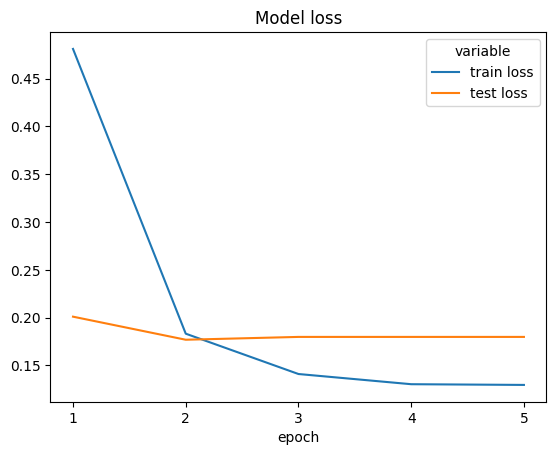

In [ ]:
# Create plot to see fine-tuning progress
loss = pd.DataFrame(
    {"train loss": history.history["loss"], "test loss": history.history["val_loss"]}
).melt()
loss["epoch"] = loss.groupby("variable").cumcount() + 1
sns.lineplot(x="epoch", y="value", hue="variable", data=loss).set(
    title="Model loss",
    ylabel="",
    xticks=range(1, loss["epoch"].max() + 1),
    xticklabels=loss["epoch"].unique(),
);

In [ ]:
text = "Saya akan menghadiri konser di Jakarta pada hari Sabtu."

In [ ]:
# Create pipeline to try the fine-tuned model
from transformers import pipeline
from transformers import AutoTokenizer

classifier = pipeline("ner", tokenizer=tokenizer, model=model)
classifier(text)

[{'entity': 'B-GPE',
  'score': 0.99261993,
  'index': 6,
  'word': 'jakarta',
  'start': 31,
  'end': 38},
 {'entity': 'B-DAT',
  'score': 0.9896311,
  'index': 9,
  'word': 'sabtu',
  'start': 49,
  'end': 54}]

In [ ]:
# Saving the fine-tuned weight to use without re-train the model
model.save_weights(PATH + "INDO-NER-weights")

# Test Saved Model


In [ ]:
id2label = {
    0: 'B-CRD',
    1: 'B-DAT',
    2: 'B-EVT',
    3: 'B-FAC',
    4: 'B-GPE',
    5: 'B-LAN',
    6: 'B-LAW',
    7: 'B-LOC',
    8: 'B-MON',
    9: 'B-NOR',
    10: 'B-ORD',
    11: 'B-ORG',
    12: 'B-PER',
    13: 'B-PRC',
    14: 'B-PRD',
    15: 'B-QTY',
    16: 'B-REG',
    17: 'B-TIM',
    18: 'B-WOA',
    19: 'I-CRD',
    20: 'I-DAT',
    21: 'I-EVT',
    22: 'I-FAC',
    23: 'I-GPE',
    24: 'I-LAN',
    25: 'I-LAW',
    26: 'I-LOC',
    27: 'I-MON',
    28: 'I-NOR',
    29: 'I-ORD',
    30: 'I-ORG',
    31: 'I-PER',
    32: 'I-PRC',
    33: 'I-PRD',
    34: 'I-QTY',
    35: 'I-REG',
    36: 'I-TIM',
    37: 'I-WOA',
    38: 'O'
}
label2id = {
    'B-CRD': 0,
    'B-DAT': 1,
    'B-EVT': 2,
    'B-FAC': 3,
    'B-GPE': 4,
    'B-LAN': 5,
    'B-LAW': 6,
    'B-LOC': 7,
    'B-MON': 8,
    'B-NOR': 9,
    'B-ORD': 10,
    'B-ORG': 11,
    'B-PER': 12,
    'B-PRC': 13,
    'B-PRD': 14,
    'B-QTY': 15,
    'B-REG': 16,
    'B-TIM': 17,
    'B-WOA': 18,
    'I-CRD': 19,
    'I-DAT': 20,
    'I-EVT': 21,
    'I-FAC': 22,
    'I-GPE': 23,
    'I-LAN': 24,
    'I-LAW': 25,
    'I-LOC': 26,
    'I-MON': 27,
    'I-NOR': 28,
    'I-ORD': 29,
    'I-ORG': 30,
    'I-PER': 31,
    'I-PRC': 32,
    'I-PRD': 33,
    'I-QTY': 34,
    'I-REG': 35,
    'I-TIM': 36,
    'I-WOA': 37,
    'O': 38
}

In [ ]:
PATH = "/content/drive/MyDrive/KERJO/Quantus Telematika Indonesia - NLP Engineer/SavedModel/"

In [ ]:
# Load the saved weight
from transformers import TFAutoModelForTokenClassification

new_model = TFAutoModelForTokenClassification.from_pretrained(
    "indolem/indobert-base-uncased", num_labels=39, id2label=id2label, label2id=label2id, from_pt=True
)
new_model.load_weights(PATH + "INDO-NER-weights")

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Try the loaded model
from transformers import pipeline
from transformers import AutoTokenizer

classifier = pipeline("ner", tokenizer=tokenizer, model=new_model)
classifier("Tolong kirimkan beberapa dokumen ke email lisa dari perusahaan BP di alamat lisa@email.com.")

[{'entity': 'B-PER',
  'score': 0.9918325,
  'index': 7,
  'word': 'lisa',
  'start': 42,
  'end': 46},
 {'entity': 'B-ORG',
  'score': 0.8996154,
  'index': 10,
  'word': 'bp',
  'start': 63,
  'end': 65},
 {'entity': 'B-ORG',
  'score': 0.67068326,
  'index': 13,
  'word': 'lisa',
  'start': 76,
  'end': 80},
 {'entity': 'I-ORG',
  'score': 0.71890754,
  'index': 14,
  'word': '@',
  'start': 80,
  'end': 81},
 {'entity': 'I-ORG',
  'score': 0.77234083,
  'index': 15,
  'word': 'email',
  'start': 81,
  'end': 86},
 {'entity': 'I-ORG',
  'score': 0.7054175,
  'index': 16,
  'word': '.',
  'start': 86,
  'end': 87},
 {'entity': 'I-ORG',
  'score': 0.72406375,
  'index': 17,
  'word': 'com',
  'start': 87,
  'end': 90}]

In [ ]:
# Create extraction function to extract information from sentences
import re
def extractor(text):
  sentence = classifier(text)

  # Email extractor
  regex = re.compile(r'[\w.+-]+@[\w-]+\.[\w.-]+')

  match = re.findall(regex, text)
  while len(match) != 0:
    print("Alamat email: " + ' '.join(map(str, match)))
    break

  # Person extractor
  person_entity = 'B-PER'
  person = [d['word'] for d in sentence if d['entity'] == person_entity]
  while len(person) != 0:
      print(f"Nama orang: ", *person)
      break

  # Company extractor
  company_entity = 'B-ORG'
  company = [d['word'] for d in sentence if d['entity'] == company_entity]
  while len(company) != 0:
    print(f"Nama perusahaan: ", *company)
    break

  # Location extractor
  location_entity = 'B-GPE'
  location = [d['word'] for d in sentence if d['entity'] == location_entity]
  while len(location) != 0:
    print(f"Nama lokasi: ", *location)
    break

  # Date extractor
  date_entity = 'B-DAT'
  date = [d['word'] for d in sentence if d['entity'] == date_entity]
  while len(date) != 0:
    print(f"Waktu: ", *date)
    break

In [ ]:
extractor("Saya akan menghadiri konser di Jakarta pada hari Sabtu.")

Nama lokasi:  jakarta
Waktu:  sabtu


In [ ]:
extractor("Tolong kirimkan beberapa dokumen ke email lisa dari perusahaan BP di alamat lisa@email.com.")

Alamat email: lisa@email.com.
Nama orang:  lisa
Nama perusahaan:  bp lisa


In [ ]:
extractor("Mohon kirimkan rincian kontrak ke email saya di john@email.com secepatnya.")

Alamat email: john@email.com
Nama perusahaan:  john


In [ ]:
extractor("Tolong kirimkan file ke email budi dari perusahaan CD di alamat budi@email.com")

Alamat email: budi@email.com
Nama orang:  budi budi


In [ ]:
extractor("Anton pergi ke Surabaya sejak hari Jumat")

Nama orang:  anton
Nama lokasi:  surabaya
Waktu:  jumat


In [ ]:
extractor("Anton dan Nila akan pergi ke perusahaan Batik Air pada hari Jumat sampai Minggu")

Nama orang:  anton nila
Nama perusahaan:  batik
Waktu:  jumat minggu


Kendala yang dihadapi:
* Kesulitan mengekstrak email secara langsung menggunakan model, karena dataset yang digunakan tidak memiliki data email
* Nama orang bisa muncul dua kali ketika model mengekstrak informasi
* Nama perusahaan lebih dari satu kata masih belum bisa terdeteksi
* Kata 'sampai' yang menunjukkan hari masih belum bisa diproses dengan baik



Kendala yang dihadapi bisa diatasi dengan membuat dataset spesifik yang memuat email. Sementara ini dalam mengekstrak email menggunakan pendekatan Regular Expression.